___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Boosting Descent, KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting Descent, KNN, Random Forest, and Confusion Matrices.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [2]:
df_raw = pd.read_csv('HR_Dataset.csv')

In [3]:
df_raw.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df_raw.isnull().sum().any()

False

In [6]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [7]:
df_raw.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [8]:
df_raw.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Here it can implied that employees who left the company had
 - low satisfaction level, 
 - low promotion rate, 
 - low salary, and 
 - worked more 

compare to who stayed in the company.

## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

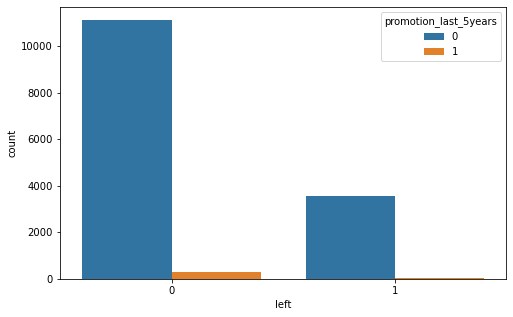

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='left', data=df_raw, hue = 'promotion_last_5years')
plt.show()

In [10]:
left_by_prom = pd.crosstab(df_raw['left'], df_raw['promotion_last_5years'])
left_by_prom['percent_ratio'] = ((left_by_prom[1] / left_by_prom[0]) * 100).round(2)
print(left_by_prom)

promotion_last_5years      0    1  percent_ratio
left                                            
0                      11128  300           2.70
1                       3552   19           0.53


In [11]:
# Ayrilanlarin % 0.53 u promosyon alirken, sirkette calismaya devam edenlerin % 2.70 i promosyon almis. 

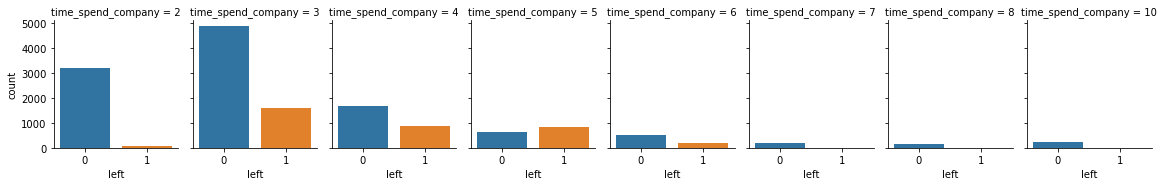

In [12]:
sns.catplot(x="left", col="time_spend_company", col_wrap=8,
                data=df_raw,
                kind="count", height=2.5, aspect=.8)
plt.show()

In [13]:
pd.crosstab(df_raw['left'], df_raw['time_spend_company'])

time_spend_company,2,3,4,5,6,7,8,10
left,,,,,,,,
0,3191,4857,1667,640,509,188,162,214
1,53,1586,890,833,209,0,0,0


In [14]:
# No employee who worked in our company for more than 7 years left the company. They can be categorized 7+. And this column can be considered as categorical.

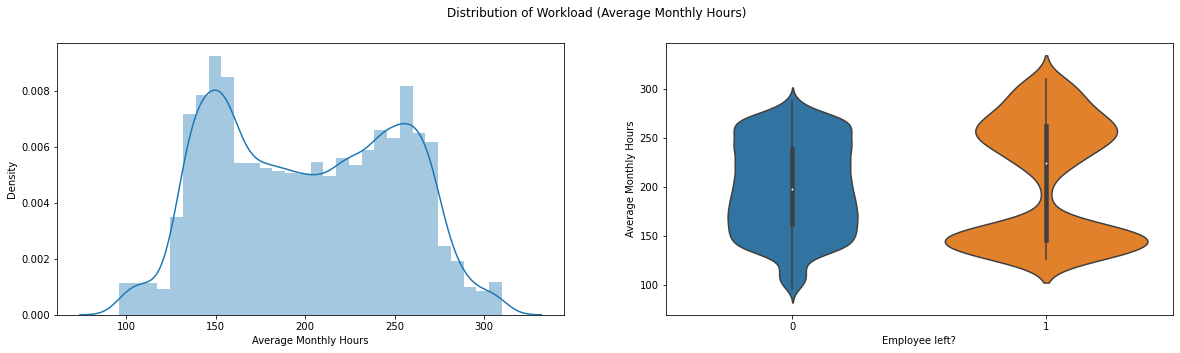

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
fig.suptitle('Distribution of Workload (Average Monthly Hours)')

sns.distplot(df_raw['average_montly_hours'],ax=ax1)
sns.violinplot(x='left', y='average_montly_hours',data=df_raw,ax=ax2)

ax1.set(xlabel='Average Monthly Hours')
ax2.set(xlabel='Employee left?')
ax2.set(ylabel='Average Monthly Hours')

plt.show()

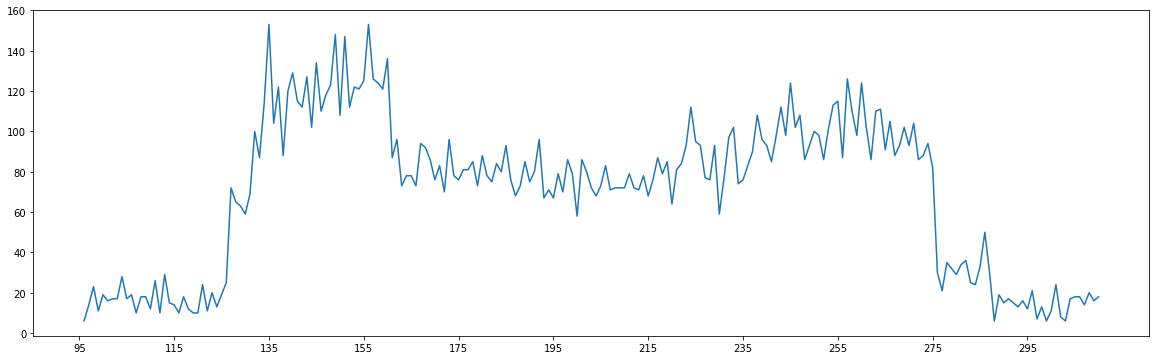

In [16]:
plt.figure(figsize=(20,6))
df_raw['average_montly_hours'].value_counts().sort_index().plot.line()
plt.xticks(np.arange(95, 300, 20))
plt.show()

In [17]:
# The new feature can be generated according to workload, and the employee can be segmented into two/three category.

In [18]:
pd.crosstab(df_raw['left'], df_raw['salary'])

salary,high,low,medium
left,,,
0,1155,5144,5129
1,82,2172,1317


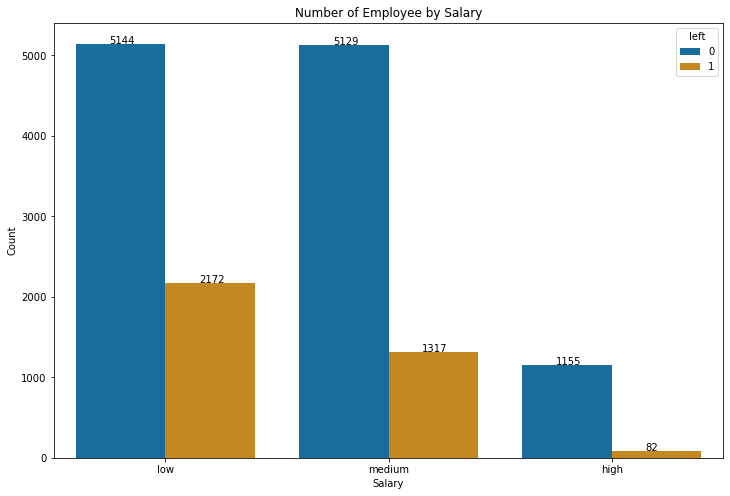

In [19]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='salary',data=df_raw,hue='left',palette='colorblind')
ax.set(xlabel='Salary')
ax.set(ylabel='Count')
ax.set(title='Number of Employee by Salary')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()))

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

0    11428
1     3571
Name: left, dtype: int64





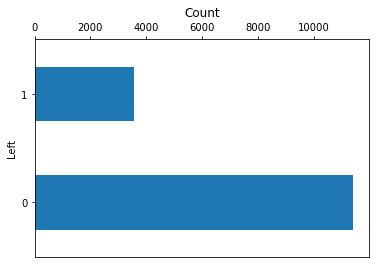

In [20]:
print(df_raw['left'].value_counts())
print('\n\n')
ax = df_raw['left'].value_counts().plot.barh()
# ax.set(xlabel='Count')
ax.set(ylabel='Left')
ax.set(title='Count')
ax.xaxis.tick_top()
plt.show()

In [21]:
# As it is clear from graph our data is imbalanced. The SMOTE(NC) can be applied to impute.

### Number of Pvalue_countsimilarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


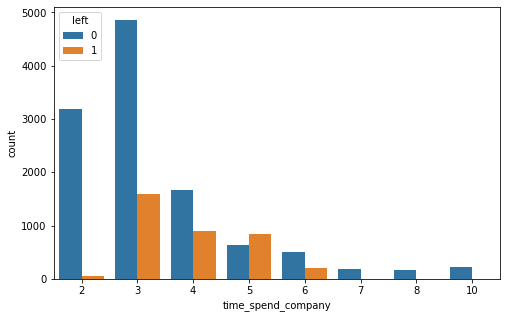

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='time_spend_company', data=df_raw, hue = 'left')
plt.show()

### Subplots of Other Features

You can use the methods of the matplotlib.

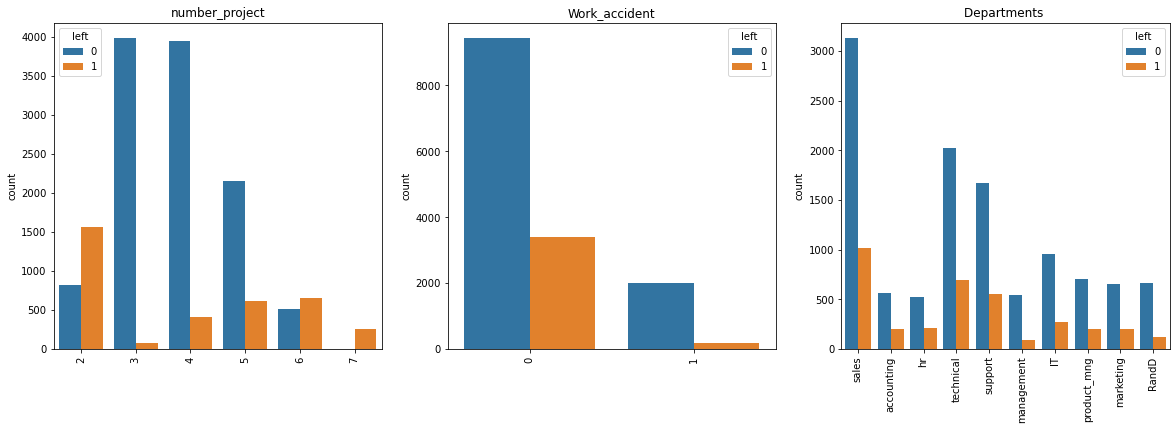

In [23]:
features=['number_project','Work_accident','Departments ']
fig=plt.subplots(figsize=(20,6))
for i, j in enumerate(features):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df_raw,hue='left')
    plt.xticks(rotation=90)
    plt.title(j)
    plt.xlabel('')

<Figure size 648x648 with 0 Axes>

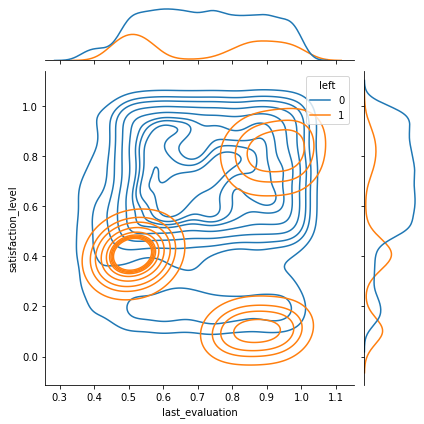

In [24]:
plt.figure(figsize=(9,9))
sns.jointplot(x='last_evaluation', y='satisfaction_level', data=df_raw, kind='kde', hue='left')
plt.show()

### Feature Engineering

In [25]:
# Time spent in company is gonna be considered as categorical.

In [26]:
df_raw.time_spend_company.unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [27]:
df = df_raw.copy()

In [28]:
df['time_spend_company'] = df_raw['time_spend_company'].astype('str')

In [29]:
def seven_plus(x):
    l = ['7','8','10']
    if x in l:
        return '7+'
    else:
        return x

In [30]:
df['time_cat'] = df['time_spend_company'].apply(seven_plus)

In [31]:
# new feature called workload
# the employee who work less than 120 hours per month will be labeled as under
# the employee who work more than 200 hours per month will be labeled as over
# the other who work between 12 and 200 will be labeled as moderate


In [32]:
def workload(x):
    if x<=220:
        return 'moderate'
    else:
        return 'over'

In [33]:
df['workload'] = df['average_montly_hours'].apply(workload)

<AxesSubplot:xlabel='workload', ylabel='count'>

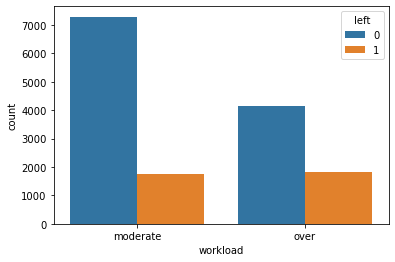

In [34]:
sns.countplot(x='workload',data=df,hue='left')

<AxesSubplot:>

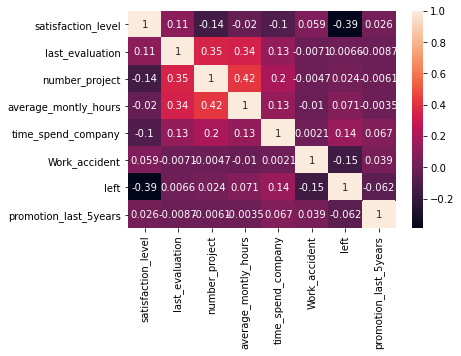

In [35]:
sns.heatmap(df_raw.corr(), annot=True)

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [36]:
df.rename(columns={'Departments ':'department'}, inplace=True)

In [37]:
df_dum = pd.get_dummies(df.drop('time_spend_company',axis=1), drop_first=True)

In [38]:
df_dum.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium', 'time_cat_3',
       'time_cat_4', 'time_cat_5', 'time_cat_6', 'time_cat_7+',
       'workload_over'],
      dtype='object')

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dum.drop('left', axis=1).values)

In [40]:
df_scaled = pd.DataFrame(df_scaled)

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [41]:
from sklearn.cluster import KMeans

left_emp =  df_dum[['satisfaction_level', 'last_evaluation']][df_dum.left == 1]

In [42]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit(left_emp)
    ssd.append(kmeans.inertia_)

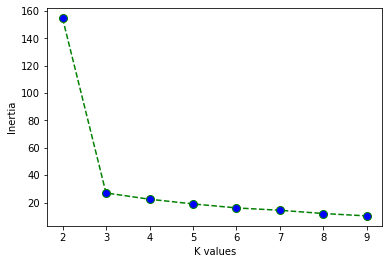

In [43]:
plt.plot(K, ssd,color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=8)
plt.xlabel('K values')
plt.ylabel('Inertia')
plt.show()

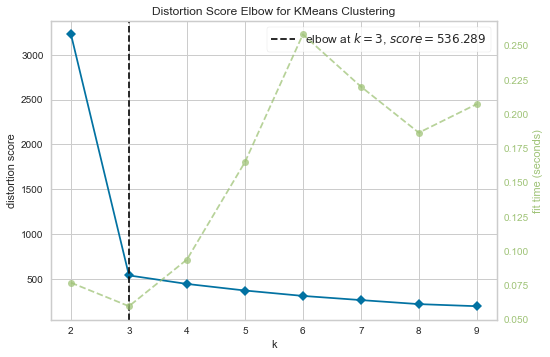

In [44]:
from sklearn.preprocessing import scale

from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(scale(left_emp))
visu.poof();

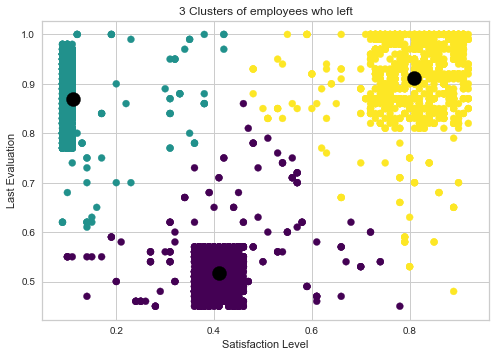

In [45]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

clusters = kmeans.labels_
centroid = kmeans.cluster_centers_

plt.scatter(left_emp.iloc[:,0], left_emp.iloc[:,1], c=clusters,cmap='viridis')
plt.scatter(centroid[:,0], centroid[:,1], c="black",s=200,alpha=1)
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')

plt.show()

## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [47]:
X = df_dum.drop('left',axis=1)
y = df_dum['left']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

 93%|█████████▎| 28/30 [00:23<00:01,  1.87it/s]

[13:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 30/30 [00:24<00:00,  1.24it/s]


In [50]:
models.sort_values('F1 Score', ascending =False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.97,0.96,0.96,0.97,0.86
BaggingClassifier,0.97,0.95,0.95,0.97,0.23
ExtraTreesClassifier,0.97,0.95,0.95,0.97,0.78
XGBClassifier,0.97,0.95,0.95,0.97,0.47
LGBMClassifier,0.96,0.95,0.95,0.96,0.20
DecisionTreeClassifier,0.96,0.95,0.95,0.96,0.06
ExtraTreeClassifier,0.95,0.94,0.94,0.95,0.03
LabelPropagation,0.95,0.94,0.94,0.95,5.76
LabelSpreading,0.95,0.94,0.94,0.95,10.19


### #Gradient Boosting Classifier

#### Model Building

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

#### Prediction

In [52]:
y_pred_gb = gb_model.predict(X_test)

#### Evaluating Model Performance

[[3390   38]
 [  94  978]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3428
           1       0.96      0.91      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



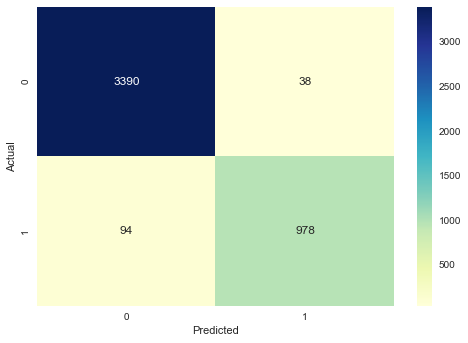

In [53]:
cnf_matrix = confusion_matrix(y_test,y_pred_gb)

print(cnf_matrix)
print('\n')
print(classification_report(y_test,y_pred_gb))

sns.heatmap(cnf_matrix, annot = True,cmap = 'YlGnBu',fmt='d')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

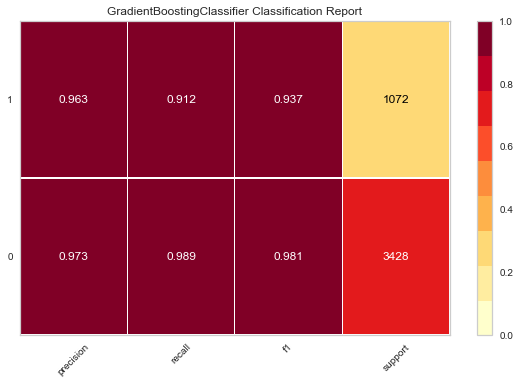

In [54]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
visualizer = ClassificationReport(gb_model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

### #KNeighbors Classifier

#### Model Building & Prediction

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [56]:
y_pred_knn = knn.predict(X_test)

#### Evaluating Model Performance

[[3289  139]
 [  78  994]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3428
           1       0.88      0.93      0.90      1072

    accuracy                           0.95      4500
   macro avg       0.93      0.94      0.93      4500
weighted avg       0.95      0.95      0.95      4500



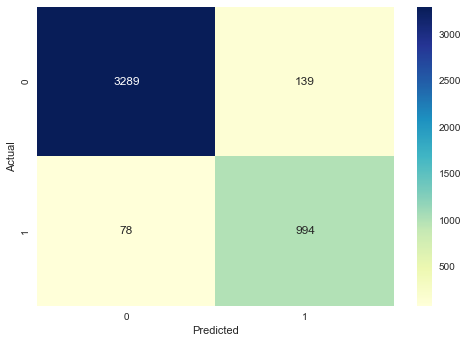

In [57]:
cnf_matrix = confusion_matrix(y_test,y_pred_knn)

print(cnf_matrix)
print('\n')
print(classification_report(y_test,y_pred_knn))

sns.heatmap(cnf_matrix, annot = True,cmap = 'YlGnBu',fmt='d')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [58]:
# Let's try other K values for KNN model.

In [59]:
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

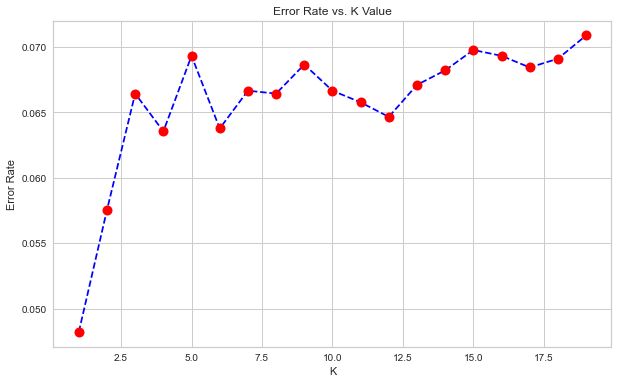

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

### #Random Forest Classifier

#### Model Building & Prediction

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [62]:
y_pred_rf = rf_model.predict(X_test)

#### Evaluating Model Performance

[[3416   12]
 [  52 1020]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.95      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500



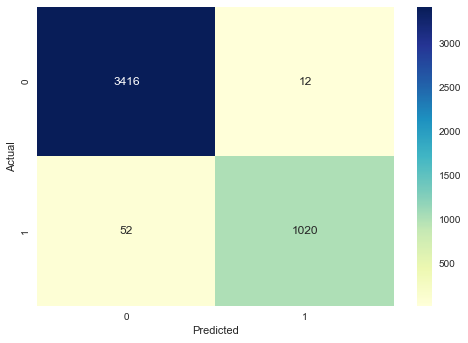

In [63]:
cnf_matrix = confusion_matrix(y_test,y_pred_rf)

print(cnf_matrix)
print('\n')
print(classification_report(y_test,y_pred_rf))

sns.heatmap(cnf_matrix, annot = True,cmap = 'YlGnBu',fmt='d')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [64]:
# import pickle

# pickle.dump(rf_model, open ('rf_model.pkl','wb'))

### Save and Export Variables as .pkl

In [65]:
# df_dum.to_pickle('dummy.pkl')

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___